In [ ]:
# A notebook to work through examples and explain the ```Manifold``` class.
- Click here for the complete script of the class: [manifold.py](https://github.com/hankbesser/brownian-manifold/blob/master/brownian_manifold/manifold.py) 

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Go to the main package directory (```brownian_manifold```) using the magic command: 
####  ```%cd  ../brownian-manifold/brownian_manifold```
- for example with an UNIX machines (this notebook originally ran on an Ubuntu operating system):

In [2]:
%cd ~/Documents/brownian-manifold/brownian_manifold

/home/hbesser/Documents/brownian-manifold/brownian_manifold


to make sure we are in the brownian-manifold directory:

In [3]:
%pwd

'/home/hbesser/Documents/brownian-manifold/brownian_manifold'

#### Now we can import ```Manifold```

In [4]:
from manifold import Manifold

## Create a Manifold object

#### Lets first look at ```Manifold``` documentation with the inline help (i.e. type ```Manifold?``` in the code cell)
- Note: the ```Manifold?``` command is a great way to read general ```Manifold``` functionality used throughout this notebook

A window will pop-up with all the documentation of the Class:

In [5]:
Manifold?

## Part 1:  
### basics of work with a 2-sphere and finite cylinder manifolds

Invoke ```Manifold``` and instantiate ```sphere_manifold``` and ```cylinder_manifold``` (or whatever you would like to name the specific instances of ```Manifold```)

In [49]:
# specify the inital paramters for 2-sphere
sphere_manifold= Manifold(manifold='sphere', 
                          radius_sphere=1, 
                          final_time=128, 
                          n_steps=60000)

In [31]:
# specify the inital paramters for finite cylinder
cylinder_manifold = Manifold(manifold='cylinder', 
                          radius_cylinder=1,
                          height_cylinder=10, 
                          final_time=128, 
                          n_steps=60000)

### 1A. Basic surface 2-sphere plots

####  Ok now the have created a  ```sphere_manifold``` (or whatever you named it) instance of ```Manifold```. Let's inspect the object.
- ```type sphere_manifold.``` then the ```tab``` key on your keyboard to see the attributes and methods

- Lets just print the inital attributes that we assigned to the instance:

In [14]:
print(sphere_manifold.manifold)
print(sphere_manifold.radius_sphere)
print(sphere_manifold.final_time)
print(sphere_manifold.n_steps)

# self.step_size should equal self.final_time/self.n_steps
print(sphere_manifold.step_size)

sphere
1
228.0
60000
0.0038


#### Plot 1: plot surface of sphere with the  ```get_sphere``` method using default options: 
-note: default setting is set ```plot=False``` (this will come in handy when plotting brownian simulation on the surface of manifolds seen in later in the notebook) 

In [15]:
sphere_manifold.get_sphere?

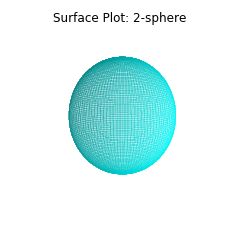

In [16]:
sphere_surface_data = sphere_manifold.get_sphere(plot=True)

#### Plot 2: plot surface of sphere with the ```plot_sphere``` method with the ability to change default plotting options:

Requires the variable storing the ```get_sphere``` surface of sphere data (i.e. this is a positional argument). The variable was named above as ```sphere_surface_data``` (but could be named anything). 

Some changeable ```matplotlib``` option include:

- ```show_axes```: default is False.
- ```has_title```: default is True.
- ```antialiased```: default is False. False shows lines on the sphere and when set to True the lines fade away. 
- ```color```: default is cyan
- ```alpha```: transparency of the surface (0.0-transparent to 1.0-opaque) default is 0.2  

In [17]:
sphere_manifold.plot_sphere?

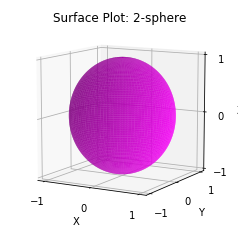

In [18]:
sphere_manifold.plot_sphere(sphere_surface_data, 
                            color='magenta', 
                            alpha=0.7, 
                            antialiased=True, 
                            show_axes=True)

### 1B. Basic surface finite cylinder plots
#### the  ```cylinder_manifold``` (or whatever you named it) instance works just like the ```sphere_manifold``` (or whatever you named it) instance

- Lets just print the inital attributes that we assigned to the instance:

In [19]:
print(cylinder_manifold.manifold)
print(cylinder_manifold.radius_cylinder)
print(cylinder_manifold.height_cylinder)
print(cylinder_manifold.final_time)
print(cylinder_manifold.n_steps)

# self.step_size should equal self.final_time/self.n_steps
print(cylinder_manifold.step_size)

cylinder
1
10
228.0
60000
0.0038


#### Plot 3: plot surface of finite cylinder with the  ```get_cylinder``` method using default options: 
-again note: default setting is set ```plot=False``` (this will come in handy when plotting brownian simulation on the surface of manifolds seen in later in the notebook) 

In [20]:
cylinder_manifold.get_cylinder?

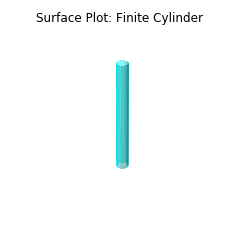

In [21]:
cylinder_surface_data = cylinder_manifold.get_cylinder(plot=True)

#### Plot 4: plot surface of sphere with the ```plot_cylinder``` method with the ability to change default plotting options:

Requires the variable storing the ```get_cylinder``` surface of sphere data (i.e. this is a positional argument). The variable was named above as ```cylinder_surface_data``` (but could be named anything).

- Look at plot 3 (calling the ```plot_sphere``` method) for the options that can be changed. 
- For plotting the surface of the finite cylinder ```show_axes=True``` it is visually informative to compare the height and radius of the finite cylinder.  

In [22]:
cylinder_manifold.plot_cylinder?

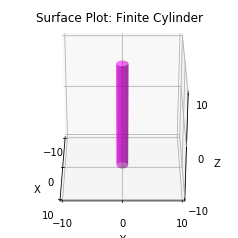

In [23]:
cylinder_manifold.plot_cylinder(cylinder_surface_data, 
                                color='magenta', 
                                alpha=0.7, 
                                antialiased=True, 
                                show_axes=True)

## Part 2 (The Interesting Stuff): 

####  Simulating and visualizing the trajectory of Brownian motion on 2-sphere and finite cylinder manifolds embedded in three-dimensional Euclidian space.

#### Plot 1: plot surface of sphere with the  ```get_sphere``` method using default options: 

In [50]:
sphere_simdata = sphere_manifold.simulate_brownian_sphere()

In [51]:
data_sphere = pd.DataFrame({'Step Number': np.arange(1,sphere_manifold.n_steps+1),
                            'X' : sphere_simdata[:,0],
                            'Y' : sphere_simdata[:,1],
                            'Z' : sphere_simdata[:,2]})
df = pd.DataFrame(data_sphere)  

#### Viewing the 3-dimensional (x,y,x) data for the last 15 steps

In [52]:
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "80%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df.tail(15).style.set_table_styles(styles)
          .set_caption("Sucess: Rotated back to the pole! (and tiny steps)"))
html

Sucess: Rotated back to the pole!
 
[Making sure the last step is rotated back to pole (0,0,1) (and the steps are very small)]

## Vislaizing Brownian Motion on Manifolds made easy:

## using the ```plot_brownian_sphere method```
To plot a figure after creating the simulation data simply;
- Pass in the generated data as the first argument (or kwarg)
- Pass in the the keyword ```steptoplot``` with a list steps numbers you would like to plot per figure as the argument
    - can specifiy 1 to 4 snap shots of a certain step number to plot per figure

#### For example, the simulation data generated in this notebook contains Brownian motion of 600,000 steps on the 2-sphere manifold (parameterized when invoking  ```Manifold``` to instantiate ```sphere_manifold```):

#### Figure 1 (1 plot): veiwing Brownian motion on 2-sphere after all 600,000 steps

In [62]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[60000])

#### Figure 2 (2 plots): veiwing Brownian Motion on the 2-sphere after only 20,000 steps and after all 600,000 steps

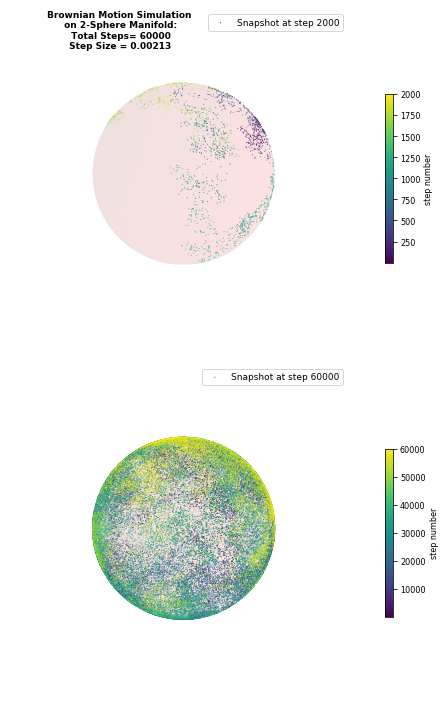

In [36]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[2000,60000])

#### Figure 3 (4 plots): veiwing Brownian motion on the 2-sphere after 20,000 , 100,000 , 400,000 , and 600,000 steps

In [61]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[2000,10000,40000,60000],has_title=False)

/home/hbesser/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/hbesser/anaconda3/lib/python3.5/site-packages/mpl_toolkits/mplot3d/proj3d.py:186: UserWarning: Warning: converting a masked element to nan.
  vec = np.array([xs,ys,zs,np.ones(xs.shape)])


In [65]:
def h(x):
    return np.tanh(x)

def h_prime(x):
    return 1 - np.tanh(x) ** 2

def f(z, w, u, b):
    return z + np.dot(h(np.dot(z, w) + b).reshape(-1,1), u.reshape(1,-1))

plt.figure(figsize=[10,20])

id_figure = 1
for i in np.arange(5):
    for j in np.arange(5):
        theta_w = 0 #represent w and u in polar coordinate system
        rho_w = 5
        theta_u = np.pi / 8 * i
        rho_u = j / 4.0
        w = np.array([np.cos(theta_w),np.sin(theta_w)]) * rho_w
        u = np.array([np.cos(theta_u),np.sin(theta_u)]) * rho_u
        b = 0
        grid_use = np.meshgrid(np.arange(-1,1,0.001), np.arange(-1,1,0.001))
        z = np.concatenate([grid_use[0].reshape(-1,1), grid_use[1].reshape(-1,1)], axis=1)
        z = np.random.normal(size=(int(1e6),2))
        z_new = f(z, w, u, b)

        heatmap, xedges, yedges = np.histogram2d(z_new[:,0], z_new[:,1], bins=50, 
                                                 range=[[-3,3],[-3,3]])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.subplot(5,5,id_figure)
        plt.imshow(heatmap, extent=extent)
        plt.title("u=(%.1f,%.1f)"%(u[0],u[1]) + "\n" +
                  "w=(%d,%d)"%(w[0],w[1]) + ", " + "b=%d"%b)
        id_figure += 1
        
        plt.xlim([-3,3])
        plt.ylim([-3,3])
plt.show()

In [66]:
x= sphere_simdata[:,0]

In [67]:
x.shape

(60000,)

In [68]:
testx=2/(np.dot(x,x)+1)

21306.780699666633

In [71]:
def h(x):
    return np.tanh(x)

def h_prime(x):
    return 1 - np.tanh(x) ** 2

def f(z, w, u, b):
    return z + np.dot(h(np.dot(z, w) + b).reshape(-1,1), u.reshape(1,-1))


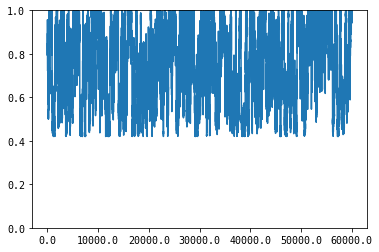

In [87]:
#figure 1
#plot theta as a function of time 

plt.figure()
plt.plot(np.arange(0,60000),test2)
ax = plt.gca()

plt.ylim([0,1])

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)


plt.show()

In [96]:
heatmap

array([[  5.,  10.,   6., ...,   0.,   0.,   0.],
       [  8.,  11.,  13., ...,   0.,   0.,   0.],
       [ 10.,  15.,  11., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,  12.,  11.,   8.],
       [  0.,   0.,   0., ...,   9.,   5.,   7.],
       [  0.,   0.,   0., ...,   5.,   4.,   9.]])